In [ ]:
#bert-base-multilingual-uncased
#https://mccormickml.com/2019/07/22/BERT-fine-tuning/
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
#!pip install torch
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
!pip install transformers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df =  pd.read_csv("/content/drive/MyDrive/scoutieDataset_promocodes_yandex_avito_wildberries_sber_marketplaces.csv")
df = df[['text', 'spam']].copy()
df = df.dropna()
df.dropna(subset = ['text'])
# Report the number of texts.
print('Number of training texts: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.tail(10)

Number of training texts: 25,121



,text,spam
25396,🔝\nМужские кварцевые наручные часы\n💵\nЦена от...,SPAM
25397,🔝\nЖенский корсет для тренировок и похудения\n...,SPAM
25398,🔝\nМагнитный зарядный кабель KUULAA\n💵\nЦена о...,SPAM
25399,🔝\nПальчиковый пульсоксиметр\n💵\nЦена от: 987\...,SPAM
25400,В течение 3 дней на AliExpress будет проходить...,SPAM
25401,🔝\nМагнитный зарядный кабель\n💵\nЦена от: 65\n...,SPAM
25402,🔥\nСегодня в официальном магазине Ситилинк на ...,SPAM
25403,🔝\nУвлажнитель воздуха\n💵\nЦена: 1086\n🇷🇺\n| 4...,SPAM
25404,🔝\nМужские спортивные штаны\n💵\nЦена от: 939\n...,SPAM
25405,🔝\nБальзам для губ с экстрактом алоэ\n💵\nЦена:...,SPAM


In [ ]:
import re
# Удаление эмодзи
def emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
#Удаление URL

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
#Удаление HTML-тегов
from bs4 import BeautifulSoup
#Function for removing html
def html(text):
    return BeautifulSoup(text, "lxml").text

In [ ]:
df = df.sample(frac=1)
df = df.head(1500)
df.head(10)

,text,spam
16466,Приложение по доставке - Яндекс Еда (раздел Ма...,SPAM
19966,💥\nAliexpress\n💥\nНовые промокоды для РФ и СНГ...,SPAM
24610,🔝\nPower Bank на 10000mAh\n💵\nЦена от: 838\n🇷🇺...,SPAM
4397,"Perfect Fit Joints Care лакомство для собак, г...",NOT SPAM
10472,🧹\nЕще один новый промокод на Мегамаркет на ка...,SPAM
11084,"😍\nПодборка - выгодные промокоды, скидки и хал...",SPAM
3302,🏠\nОтелло (от 2ГИС) - выгодные предложения на ...,SPAM
9000,Как сдать анализы со скидкой 30%?\nЗаписаться ...,SPAM
18636,🔝\nЗарядное устройство\n💵\nЦена от: 3357\n🇷🇺\n...,SPAM
15825,⚡️\nУмные часы TicWatch C2 Plus\nЧасы получили...,SPAM


In [ ]:
# Get the lists of sentences and their labels.
def categorise(row):
    if row['spam'] == 'NOT SPAM':
        return 0
    elif row['spam'] == 'SPAM':
        return 1
df=df.dropna()
df['text_ready'] = df['text'].apply(emoji)
df['text_ready'] = df['text_ready'].apply(remove_urls)
df['text_ready'] = df['text_ready'].apply(html)
df[['text_ready']].head()
df['labels'] = df.apply(lambda row: categorise(row), axis=1)

In [ ]:
df.sample(10)

,text,spam,text_ready,labels
17185,⚡️\nВнешний аккумулятор Baseus для ноутбуков м...,SPAM,Внешний аккумулятор Baseus для ноутбуков мощно...,1
10286,Промокоды на повторные заказы:\nАшан\nPFR5QMM\...,SPAM,Промокоды на повторные заказы:\nАшан\nPFR5QMM\...,1
16626,Лента Онлайн\n🔥\nНовый промокод\nJUNE10555 на...,SPAM,Лента Онлайн\n\nНовый промокод\nJUNE10555 на ...,1
9856,ТЦ METRO - скидки до 22% на первые три покупки...,SPAM,ТЦ METRO - скидки до 22% на первые три покупки...,1
20958,⚡️\nЗарядка KUULAA 33Вт GAN по отличной цене!\...,SPAM,Зарядка KUULAA 33Вт GAN по отличной цене!\nМин...,1
17457,🔝\nИгровые наушники\n💵\nЦена: 1510\n🇷🇺\n| 550\...,SPAM,Игровые наушники\n\nЦена: 1510\n\n| 550\n\n| 1...,1
10223,🛍\n1000 баллов на\nAliexpress\nПромокод действ...,SPAM,1000 баллов на\nAliexpress\nПромокод действует...,1
21079,⚡️\nУвлажнитель воздуха Xiaomi Deerma F628S се...,SPAM,Увлажнитель воздуха Xiaomi Deerma F628S сейчас...,1
1369,#ЯндексМаркет\nИгровая приставка Nintendo Swit...,SPAM,#ЯндексМаркет\nИгровая приставка Nintendo Swit...,1
22522,⚡️\nФлагманские TWS наушники Huawei FreeBuds P...,SPAM,Флагманские TWS наушники Huawei FreeBuds Pro с...,1


In [ ]:
df.head(10)

,text,spam,text_ready,labels
16466,Приложение по доставке - Яндекс Еда (раздел Ма...,SPAM,Приложение по доставке - Яндекс Еда (раздел Ма...,1
19966,💥\nAliexpress\n💥\nНовые промокоды для РФ и СНГ...,SPAM,Aliexpress\n\nНовые промокоды для РФ и СНГ:\n\...,1
24610,🔝\nPower Bank на 10000mAh\n💵\nЦена от: 838\n🇷🇺...,SPAM,Power Bank на 10000mAh\n\nЦена от: 838\n\n| 30...,1
4397,"Perfect Fit Joints Care лакомство для собак, г...",NOT SPAM,"Perfect Fit Joints Care лакомство для собак, г...",0
10472,🧹\nЕще один новый промокод на Мегамаркет на ка...,SPAM,🧹\nЕще один новый промокод на Мегамаркет на ка...,1
11084,"😍\nПодборка - выгодные промокоды, скидки и хал...",SPAM,"Подборка - выгодные промокоды, скидки и халява...",1
3302,🏠\nОтелло (от 2ГИС) - выгодные предложения на ...,SPAM,Отелло (от 2ГИС) - выгодные предложения на оте...,1
9000,Как сдать анализы со скидкой 30%?\nЗаписаться ...,SPAM,Как сдать анализы со скидкой 30%?\nЗаписаться ...,1
18636,🔝\nЗарядное устройство\n💵\nЦена от: 3357\n🇷🇺\n...,SPAM,Зарядное устройство\n\nЦена от: 3357\n\n| 1219...,1
15825,⚡️\nУмные часы TicWatch C2 Plus\nЧасы получили...,SPAM,Умные часы TicWatch C2 Plus\nЧасы получили 1 Г...,1


In [ ]:
df.loc[df.labels == 0].sample(5)[['text_ready', 'labels']]

,text_ready,labels
20113,Промокоды на избранные товары со страницы акци...,0
6844,Кешбэк до 48% на конфеты Кремлина\n\nСсылка на...,0
3232,"Сэкономьте на покупках с приложением ""Шерри""\n...",0
14914,Ситилинк - скидки до 25% на велосипеды.\nПервы...,0
14594,AliExpress\n\n(актуально с 11:00 по МСК)\nЕсть...,0


In [ ]:
# Get the lists of sentences and their labels.
sentences = df.text_ready.values
labels = df.labels.values

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased', do_lower_case=True)

Loading BERT tokenizer...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [ ]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (1056 > 512). Running this sequence through the model will result in indexing errors


Max sentence length:  1190


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        padding='max_length',      # Use 'padding' instead of 'pad_to_max_length' (deprecated)
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  Приложение по доставке - Яндекс Еда (раздел Магазины)

Цены такие же, как в самих магазинах! Только ещё есть промокоды, которые суммируются со скидками

А привезут бесплатно

‼
ВСЕ ТРИ ПРОМО ПРОХОДЯТ НА ОДНОМ АККАУНТЕ
‼
СНАЧАЛА ДЕЛАЕМ ЗАКАЗ ПО ОБЩЕМУ, ПОТОМ ВКУС ВИЛЛ, ПОТОМ ЛЕНТА

🟡
R20-C9V0GQW1T  на 20% (от 1 500 ₽) до 31.07 - ОБЩИЙ
🟡
VS20-WRXQ1AA24 на 20% (от 1 500 ₽) до 31.07 - ВКУС ВИЛЛ
🟡
LN20-FCZHSUDTJ  на 20% (от 1 500 ₽) до 31.07 - ЛЕНТА

Все промо действуют, если ни разу не делали заказ в этих разделах
ВСЕ ПРОМО СУММИРУЮТСЯ СО СКИДКАМ
ССЫЛКА

Token IDs: tensor([  101, 52582, 10291, 60049, 76487, 10226,   118, 33352, 12253, 17390,
          312, 11056,   113, 17552, 49045, 68848, 10328,   114, 14159, 11762,
        29982, 12046,   117, 11000,   309, 63186, 10395, 68848, 12750,   106,
        13855, 14971, 17314, 12630, 18095, 11843, 11899,   117, 14418, 10626,
        10260, 50480, 71505, 10690, 11041,   323, 10736, 29910, 10550,   307,
        10842, 91959, 20953,   

In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

1,350 training samples
  150 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it
# here. For fine-tuning BERT on a specific task, the authors recommend a batch
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
from transformers import BertForSequenceClassification, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-uncased",
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (105879, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              

In [ ]:
!pip install adamp

from adamp import AdamP
# Note: AdamW is a class from the huggingface library (as opposed to pytorch)
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamP(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


  Preparing metadata (setup.py) ... done
  Created wheel for adamp: filename=adamp-0.3.0-py3-none-any.whl size=5981 sha256=5b5c85dfca103d0b847e0a9c9d8004f017dab0edcae7a061342386533b2241d9
  Stored in directory: /root/.cache/pip/wheels/33/f9/d6/b2ed816e1f321f6dcf72a99c954223b1259477095f40434979
Successfully built adamp


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4.
epochs = 3

# Total number of training steps is [number of batches] x [number of epochs].
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 34

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss,
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because
        # accumulating the gradients is "convenient while training RNNs".
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward`
        # function and pass down the arguments. The `forward` function is
        # documented here:
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids,
                       token_type_ids=None,
                       attention_mask=b_input_mask,
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids,
                           token_type_ids=None,
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the
        # output values prior to applying an activation function like the
        # softmax.
        loss = result.loss
        logits = result.logits

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)


    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...
  Batch    40  of     43.    Elapsed: 0:00:22.

  Average training loss: 0.29
  Training epcoh took: 0:00:23

Running Validation...
  Accuracy: 0.96
  Validation Loss: 0.18
  Validation took: 0:00:00

======== Epoch 2 / 3 ========
Training...
  Batch    40  of     43.    Elapsed: 0:00:18.

  Average training loss: 0.22
  Training epcoh took: 0:00:19

Running Validation...
  Accuracy: 0.96
  Validation Loss: 0.16
  Validation took: 0:00:01

======== Epoch 3 / 3 ========
Training...
  Batch    40  of     43.    Elapsed: 0:00:18.

  Average training loss: 0.20
  Training epcoh took: 0:00:19

Running Validation...
  Accuracy: 0.96
  Validation Loss: 0.15
  Validation took: 0:00:01

Training complete!
Total training took 0:01:02 (h:mm:ss)


In [ ]:
#summary of the training process
import pandas as pd

# Display floats with two decimal places.
pd.set_option('display.precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.29,0.18,0.96,0:00:23,0:00:00
2,0.22,0.16,0.96,0:00:19,0:00:01
3,0.20,0.15,0.96,0:00:19,0:00:01


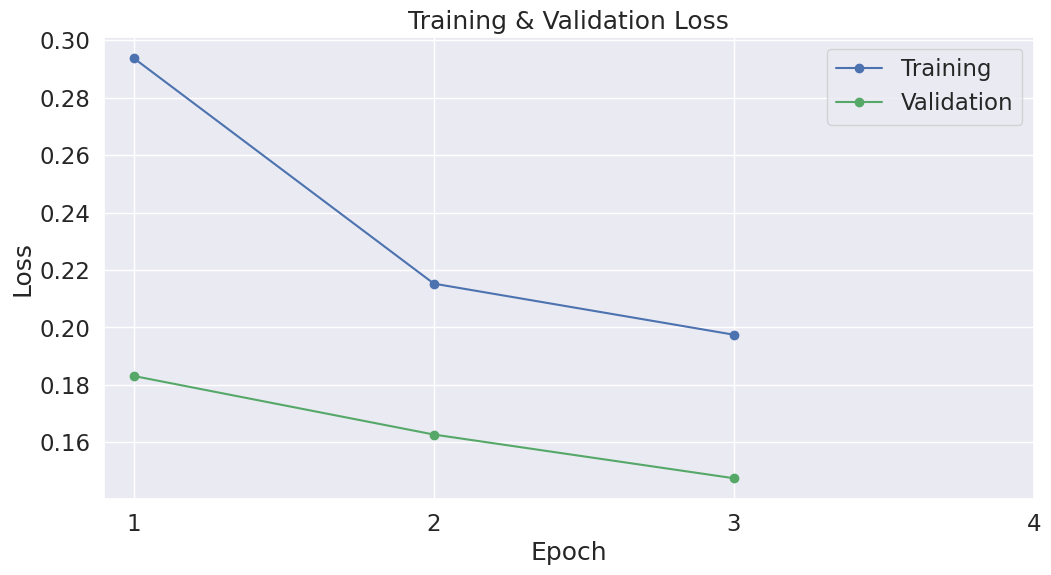

In [ ]:
import matplotlib.pyplot as plt
#% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()